In [ ]:
# Khai bao thu vien 
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout,Flatten
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf 

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

169017344/169001437 [==============================] - 12s 0us/step


In [ ]:
# ĐƯA GIÁ TRỊ VỀ TỪ 0-1
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu',
input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='mean_squared_error',optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size =256, epochs = 1000, validation_split = 0.2)
model.save('final_model.h5')

Epoch 1/1000
157/157 [==============================] - 4s 8ms/step - loss: 0.0098 - acc: 0.0367 - val_loss: 0.0098 - val_acc: 0.0657
Epoch 2/1000
157/157 [==============================] - 1s 6ms/step - loss: 0.0097 - acc: 0.0676 - val_loss: 0.0096 - val_acc: 0.0821
Epoch 3/1000
157/157 [==============================] - 1s 8ms/step - loss: 0.0096 - acc: 0.0856 - val_loss: 0.0096 - val_acc: 0.1050
Epoch 4/1000
157/157 [==============================] - 1s 6ms/step - loss: 0.0096 - acc: 0.1019 - val_loss: 0.0095 - val_acc: 0.1200
Epoch 5/1000
157/157 [==============================] - 1s 6ms/step - loss: 0.0095 - acc: 0.1150 - val_loss: 0.0094 - val_acc: 0.1253
Epoch 6/1000
157/157 [==============================] - 1s 6ms/step - loss: 0.0095 - acc: 0.1207 - val_loss: 0.0094 - val_acc: 0.1314
Epoch 7/1000
157/157 [==============================] - 1s 6ms/step - loss: 0.0094 - acc: 0.1294 - val_loss: 0.0093 - val_acc: 0.1419
Epoch 8/1000
157/157 [==============================] - 1s 6ms

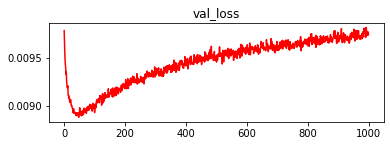

In [ ]:
plt.subplot(211)
plt.title('val_loss')
plt.plot(history.history['val_loss'], color='red',
label='train')

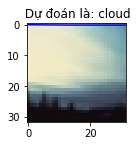

In [ ]:
#VE DO THI VAL-ACC
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='blue',
label='train')
test =8
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']
plt.title(" Dự đoán là: " +
str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test],cmap=plt.get_cmap('gray'))

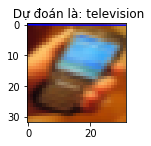

In [ ]:
#VE DO THI VAL-ACC
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='blue',
label='train')
test =800
Label = ['apple', 'aquarium_fish', 'baby', 'bear','beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 
'bridge', 'bus', 'butterfly', 'camel','can', 'castle', 'caterpillar', 'cattle', 'chair','chimpanzee', 'clock', 
'cloud', 'cockroach', 'couch','crab', 'crocodile', 'cup', 'dinosaur', 'dolphin','elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
'house', 'kangaroo', 'keyboard', 'lamp','lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
'otter', 'palm_tree', 'pear', 'pickup_truck','pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
'skyscraper', 'snail', 'snake', 'spider', 'squirrel','streetcar', 'sunflower', 'sweet_pepper', 'table',
'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
'willow_tree', 'wolf', 'woman', 'worm']
plt.title(" Dự đoán là: " +
str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test],cmap=plt.get_cmap('gray'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Cifar100_ANN.ipynb')

Mounted at /content/drive
--2022-05-19 09:05:23--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-19 09:05:23 (38.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Cifar100_ANN.ipynb to pdf
[NbConvertApp] Support files will be in Cifar100_ANN_files/
[NbConvertApp] Making directory ./Cifar100_ANN_files
[NbConvertApp] Making directory ./Cifar100_ANN_files
[NbConvertApp] Making directory ./Cifar100_ANN_files
[NbConvertApp] Writing 187531 bytes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'